In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv('migration_nz.csv')
df.head()

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


In [3]:
df.shape

(86526, 5)

In [34]:
df.columns

Index(['Measure', 'Country', 'Citizenship', 'Year', 'Value'], dtype='object')

In [36]:
print(df.dtypes)

Measure         object
Country         object
Citizenship     object
Year             int64
Value          float64
dtype: object


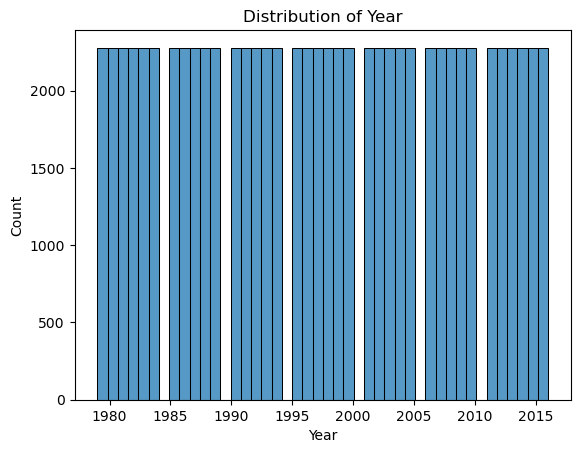


KeyboardInterrupt



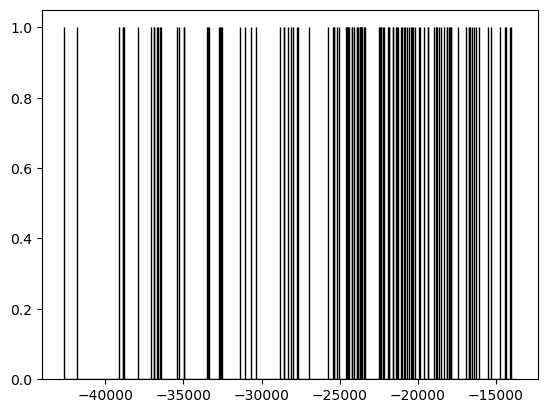

In [37]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure()
    sns.histplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
sns.pairplot(df, vars=numeric_cols, hue='Country')
plt.show()

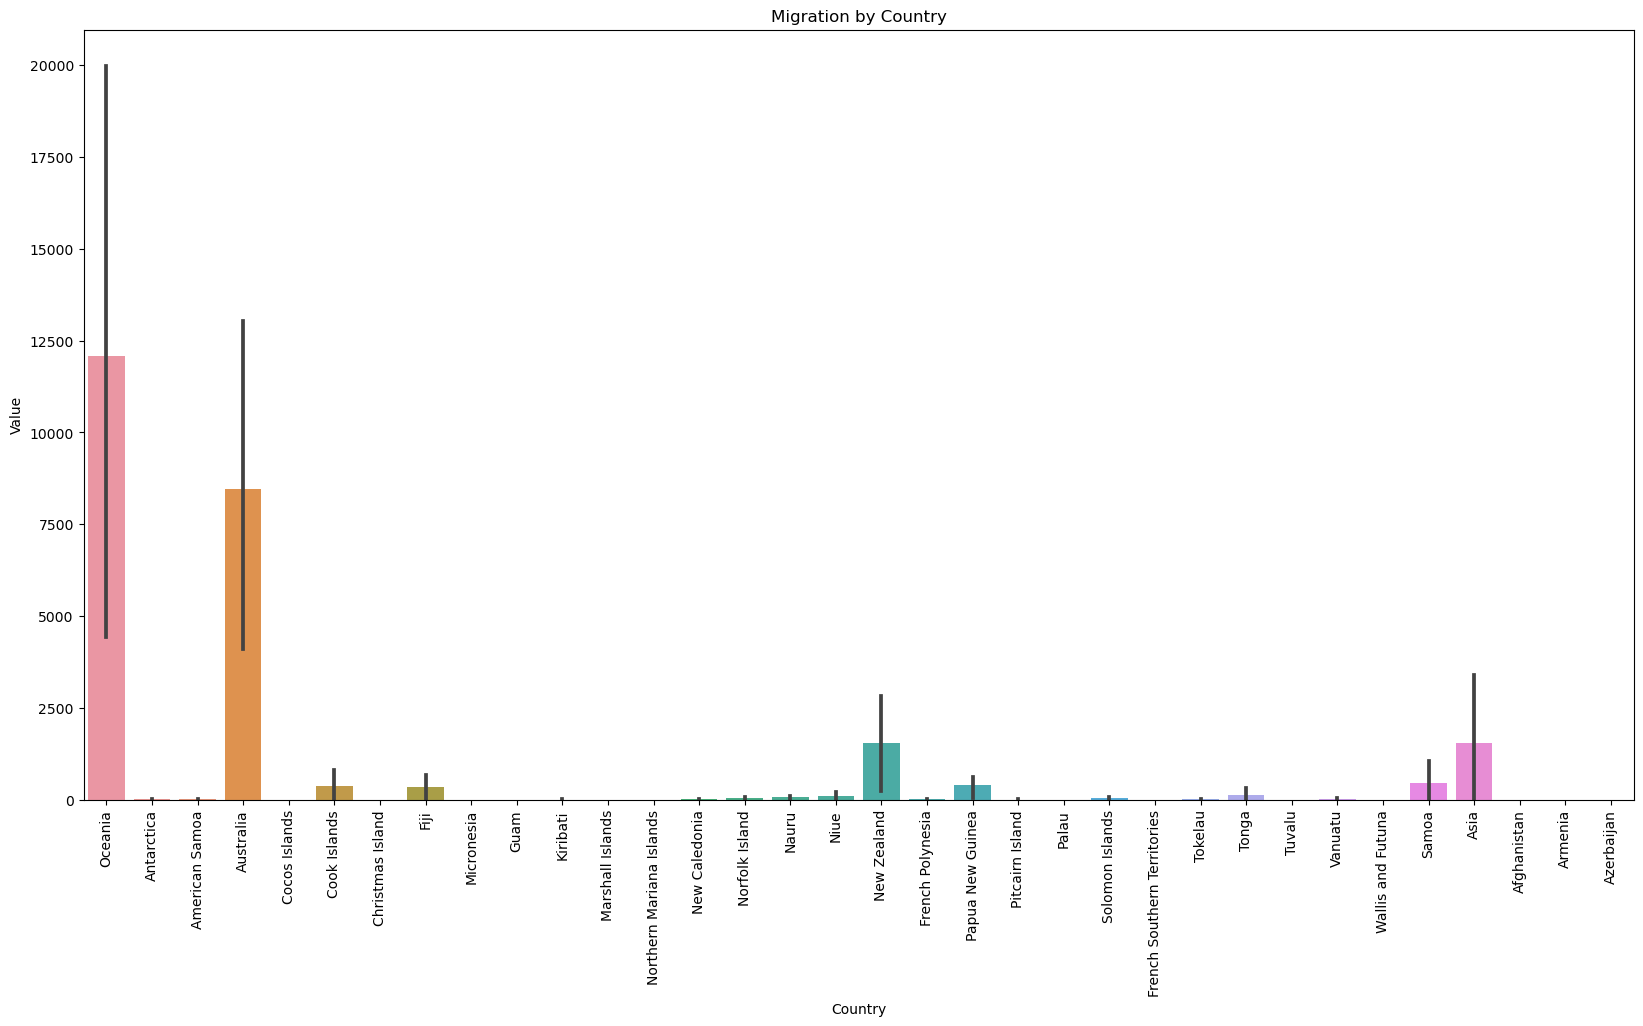

In [31]:
plt.figure(figsize = (20,10))
nd = df.head(100)
sns.barplot(x= 'Country', y ='Value', data = nd)
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Migration by Country')
plt.xticks(rotation = 90)
plt.show()

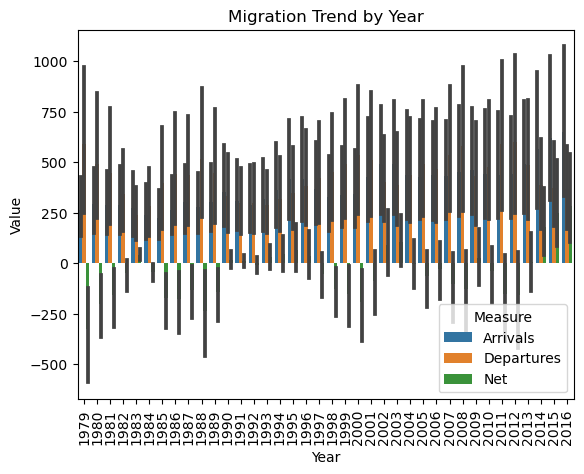

In [12]:
sns.barplot(data=df, x='Year', y='Value', hue='Measure')
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Migration Trend by Year')
plt.show()

In [16]:
df.isnull().sum()

Measure        0
Country        0
Citizenship    0
Year           0
Value          0
dtype: int64

In [49]:
df['Value'] = df['Value'].fillna(df['Value'].median())

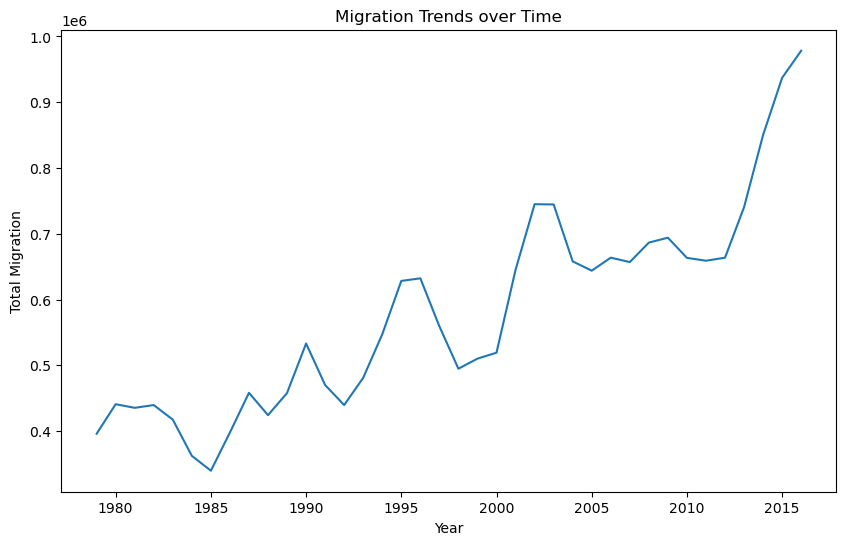

In [19]:
time_series = df.groupby('Year')['Value'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_series)
plt.xlabel('Year')
plt.ylabel('Total Migration')
plt.title('Migration Trends over Time')
plt.show()

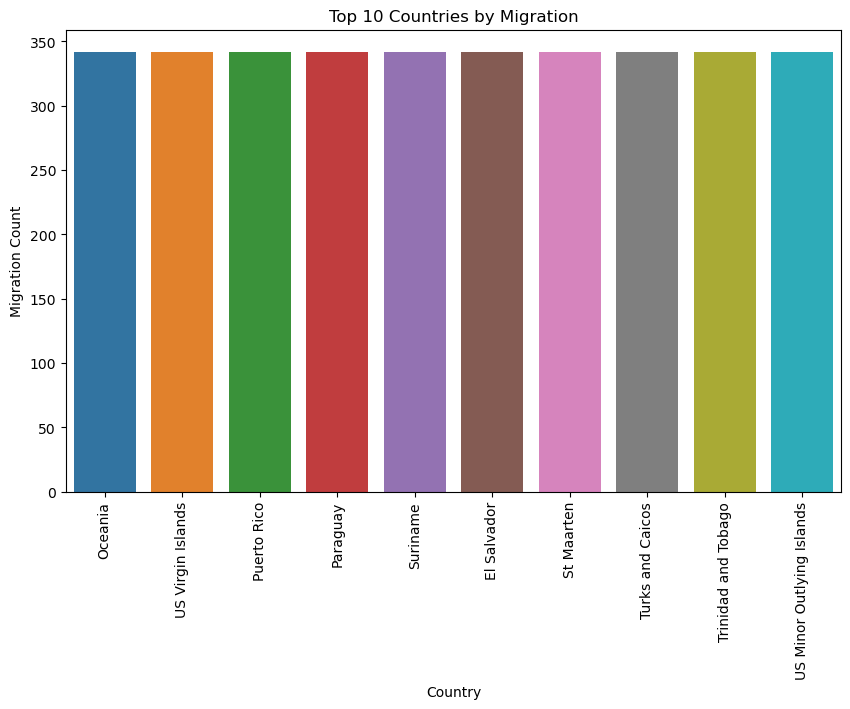

In [25]:
country_counts = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xlabel('Country')
plt.ylabel('Migration Count')
plt.title('Top 10 Countries by Migration')
plt.xticks(rotation=90)
plt.show()

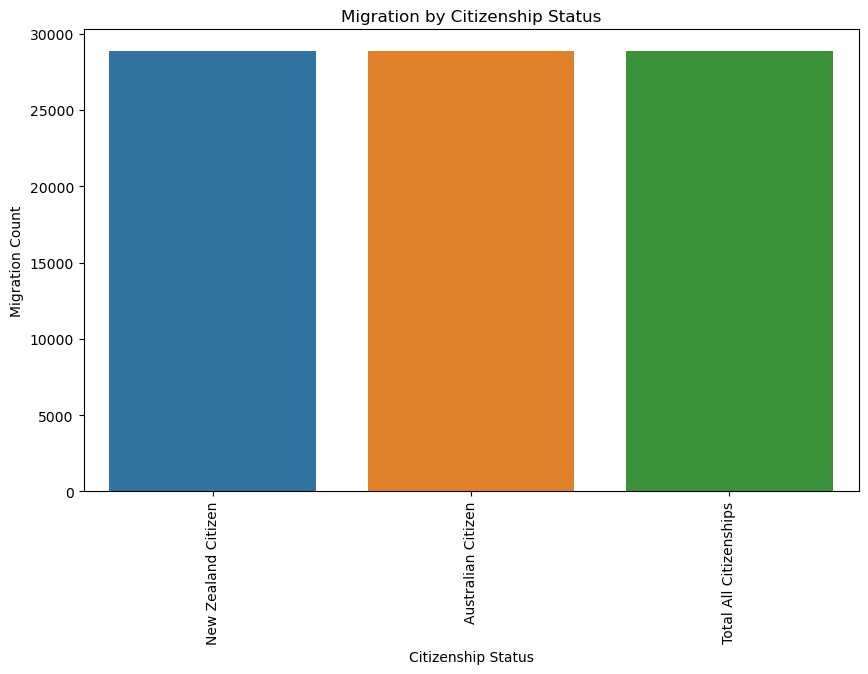

In [28]:
citizenship_counts = df['Citizenship'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=citizenship_counts.index, y=citizenship_counts.values)
plt.xlabel('Citizenship Status')
plt.ylabel('Migration Count')
plt.title('Migration by Citizenship Status')
plt.xticks(rotation=90)
plt.show()

C:\Users\francis mawutor\AppData\Local\Temp\ipykernel_9284\2935713837.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


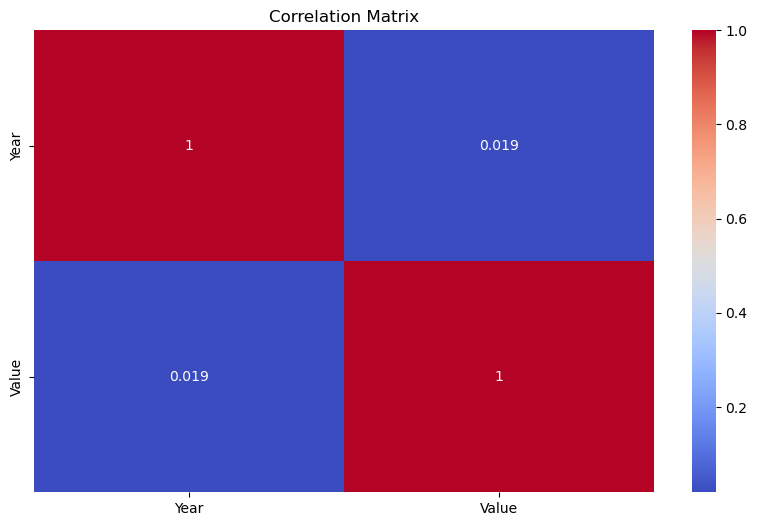

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [32]:
agg_stats = df.groupby(['Country', 'Year'])['Value'].agg(['mean', 'median', 'min', 'max']).reset_index()
data = df.merge(agg_stats, on=['Country', 'Year'], how='left')
agg_stats
print(data.head())

    Measure     Country             Citizenship  Year    Value         mean  \
0  Arrivals     Oceania     New Zealand Citizen  1979  11817.0  8048.444444   
1  Arrivals     Oceania      Australian Citizen  1979   4436.0  8048.444444   
2  Arrivals     Oceania  Total All Citizenships  1979  19965.0  8048.444444   
3  Arrivals  Antarctica     New Zealand Citizen  1979     10.0     5.111111   
4  Arrivals  Antarctica      Australian Citizen  1979      0.0     5.111111   

   median      min      max  
0  4436.0 -33512.0  53477.0  
1  4436.0 -33512.0  53477.0  
2  4436.0 -33512.0  53477.0  
3     2.0     -1.0     13.0  
4     2.0     -1.0     13.0  


C:\Users\francis mawutor\AppData\Local\Temp\ipykernel_9284\1305703102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


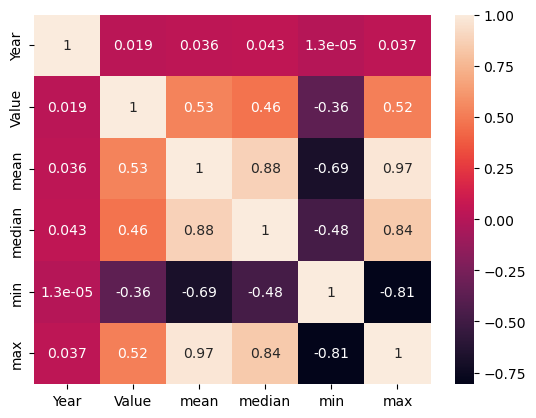

In [42]:
correlation = data.corr()
sns.heatmap(correlation, annot = True)
plt.show()

In [43]:
correlation

,Year,Value,mean,median,min,max
Year,1.000000,0.019278,0.036387,0.043279,0.000013,0.036822
Value,0.019278,1.000000,0.529788,0.464450,-0.363276,0.515195
mean,0.036387,0.529788,1.000000,0.876670,-0.685699,0.972455
median,0.043279,0.464450,0.876670,1.000000,-0.478581,0.842539
min,0.000013,-0.363276,-0.685699,-0.478581,1.000000,-0.807315
max,0.036822,0.515195,0.972455,0.842539,-0.807315,1.000000


In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [50]:
categorical_cols = df.select_dtypes(include='object').columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [51]:
x = df.drop(['Value'], axis=1)
y = df['Value']

In [52]:
numeric_cols = x.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])


In [53]:
print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())

       Measure  Country  Citizenship      Year
67611        2      178            1  0.959065
72559        2      208            0  1.141379
5248         0      207            0 -1.502168
43274        0       16            2  0.047497
14188        0        1            0 -1.137541
       Measure  Country  Citizenship      Year
83203        1      159            1  1.597163
84796        0       31            1  1.688319
12526        1       27            0 -1.228698
46695        1       41            1  0.138654
48950        1       12            2  0.229811
67611       -5.0
72559        0.0
5248         0.0
43274    10606.0
14188       12.0
Name: Value, dtype: float64
83203      4.0
84796      8.0
12526      0.0
46695    613.0
48950     52.0
Name: Value, dtype: float64


In [45]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size =.2, random_state =42)


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 3112.3422059796226
Test RMSE: 3071.668227925605


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [60]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
dt_predictions_train = dt_model.predict(x_train)
dt_predictions_test = dt_model.predict(x_test)
dt_rmse_train = mean_squared_error(y_train, dt_predictions_train, squared=False)
dt_rmse_test = mean_squared_error(y_test, dt_predictions_test, squared=False)
print("Decision Tree Train RMSE:", dt_rmse_train)
print("Decision Tree Test RMSE:", dt_rmse_test)


Decision Tree Train RMSE: 0.0
Decision Tree Test RMSE: 712.6088886039914


In [61]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
rf_predictions_train = rf_model.predict(x_train)
rf_predictions_test = rf_model.predict(x_test)
rf_rmse_train = mean_squared_error(y_train, rf_predictions_train, squared=False)
rf_rmse_test = mean_squared_error(y_test, rf_predictions_test, squared=False)
print("Random Forest Train RMSE:", rf_rmse_train)
print("Random Forest Test RMSE:", rf_rmse_test)


Random Forest Train RMSE: 247.4498628859206
Random Forest Test RMSE: 629.9916941370827


In [62]:
svm_model = SVR()
svm_model.fit(x_train, y_train)
svm_predictions_train = svm_model.predict(x_train)
svm_predictions_test = svm_model.predict(x_test)
svm_rmse_train = mean_squared_error(y_train, svm_predictions_train, squared=False)
svm_rmse_test = mean_squared_error(y_test, svm_predictions_test, squared=False)
print("Support Vector Machine Train RMSE:", svm_rmse_train)
print("Support Vector Machine Test RMSE:", svm_rmse_test)


KeyboardInterrupt: 

In [63]:
nn_model = MLPRegressor()
nn_model.fit(x_train, y_train)
nn_predictions_train = nn_model.predict(x_train)
nn_predictions_test = nn_model.predict(x_test)
nn_rmse_train = mean_squared_error(y_train, nn_predictions_train, squared=False)
nn_rmse_test = mean_squared_error(y_test, nn_predictions_test, squared=False)
print("Neural Network Train RMSE:", nn_rmse_train)
print("Neural Network Test RMSE:", nn_rmse_test)

C:\Users\francis mawutor\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Neural Network Train RMSE: 3073.777813918975
Neural Network Test RMSE: 3035.759898556367


In [64]:
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Support Vector Machine': svm_model,
    'Neural Network': nn_model,
    'Linear Regression' : model
}


In [67]:
best_model_name = min(models, key=lambda x: mean_squared_error(y_test, models[x].predict(x_test), squared=False))
best_model = models[best_model_name]
print("Best Model:", best_model_name)


KeyboardInterrupt: 